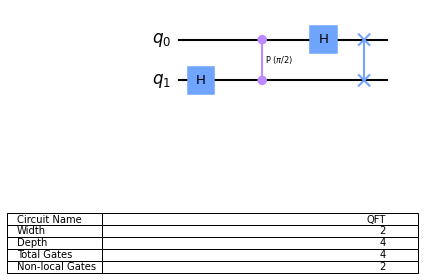

In [1]:
# 1.3.6 quantum fourier transform
import numpy as np
from qiskit import *
%matplotlib inline
from qiskit.visualization import plot_state_city
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT
from qiskit.tools.jupyter.library import _generate_circuit_library_visualization

# generate and check the qft part of the circuit
qft = QFT(2)
_generate_circuit_library_visualization(qft)

In [2]:
# create the full circuit
qr=QuantumRegister(2,'q')
cr=ClassicalRegister(2,'c')

circuit = QuantumCircuit(qr,cr)
circuit.x(0)
circuit.append(qft,qr)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


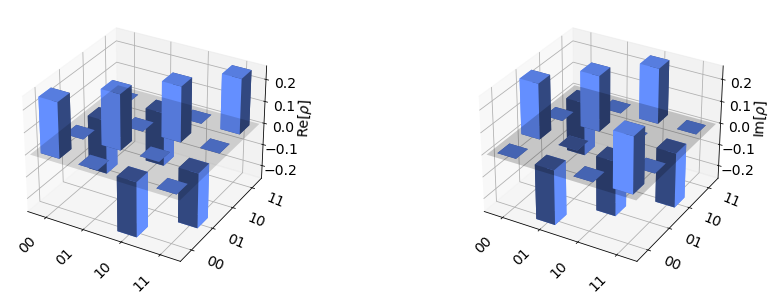

In [3]:
# city diagram
backend = Aer.get_backend('statevector_simulator')
job = execute(circuit, backend)
result = job.result()
outputstate = result.get_statevector(circuit, decimals=4)
plot_state_city(outputstate)

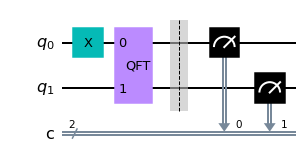

In [4]:
# measurement
circuit.barrier()
circuit.measure(range(2),range(2))
circuit.draw('mpl')


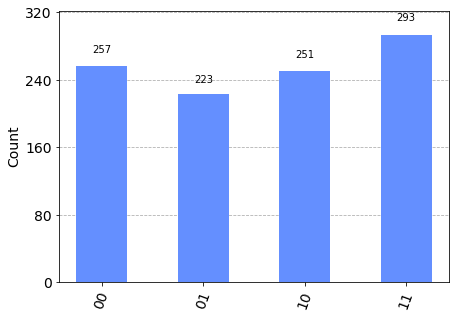

In [5]:
# histogram
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(circuit, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(circuit)
plot_histogram(counts)